/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


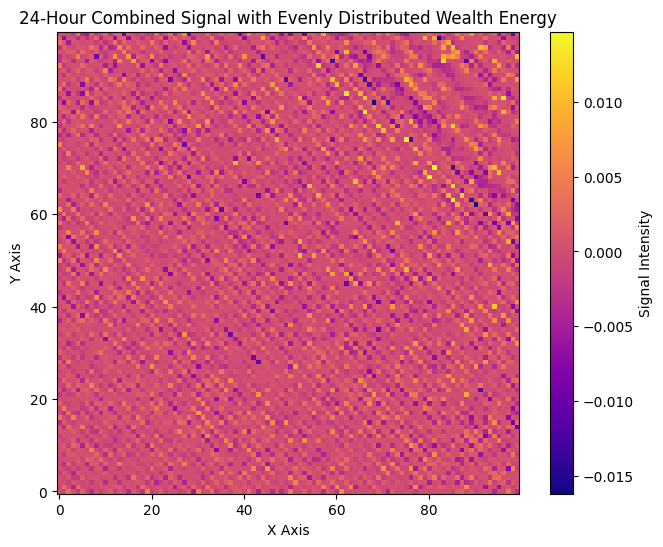

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the waveform and time
waveform_size = 100  # Size of the 2D grid (waveform)
frequency = 0.5  # Frequency of the wave
amplitude = 5.0  # Amplitude of the wave
direction_angle = np.pi / 4  # Direction in radians (e.g., pi/4 is 45 degrees)
total_time_hours = 24  # Total timespan in hours
time_steps = 240  # Number of time steps (e.g., 240 time steps for 24 hours means 10 steps per hour)

# Time step interval (e.g., 10 time steps per hour)
time_interval = total_time_hours / time_steps

# Generate a 2D grid of coordinates
x = torch.linspace(-waveform_size // 2, waveform_size // 2, waveform_size)
y = torch.linspace(-waveform_size // 2, waveform_size // 2, waveform_size)
X, Y = torch.meshgrid(x, y)

# First Layer: Infinite directional waveform (repeating signal over time)
def infinite_waveform(t):
    return amplitude * torch.cos(2 * np.pi * frequency * (X * torch.cos(torch.tensor(direction_angle)) + Y * torch.sin(torch.tensor(direction_angle))) + 2 * np.pi * t)

# Second Layer: Wealth Data transformed into energy
wealth_data = torch.rand(waveform_size, waveform_size) * 100  # Simulate random wealth values
total_wealth_energy = wealth_data ** 2  # Convert wealth to energy

# Third Layer: VPN protection (adding noise or encryption to wealth data)
noise_mask = torch.randn(waveform_size, waveform_size) * 0.1  # Small random noise
protected_wealth_energy = total_wealth_energy + noise_mask  # Obscure wealth data with noise

# Evenly distribute wealth energy over the 24-hour period (each time step receives a fraction of wealth)
wealth_energy_per_time = protected_wealth_energy / time_steps

# Simulate the combined signal over 24 hours (even distribution of wealth energy)
infinite_signal = torch.zeros(waveform_size, waveform_size)
for t in range(time_steps):
    wave = infinite_waveform(t * time_interval)  # Scale time by interval
    infinite_signal += wave * wealth_energy_per_time  # Evenly distribute wealth energy over time

# Visualize the final infinite signal that combines all layers over the 24-hour period
plt.figure(figsize=(8, 6))
plt.imshow(infinite_signal.numpy(), cmap='plasma', origin='lower')
plt.title("24-Hour Combined Signal with Evenly Distributed Wealth Energy")
plt.colorbar(label='Signal Intensity')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show()